In [40]:
#Import Statements

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

#importing the data set

df = pd.read_csv('/Users/rybinmathalikunnel/Downloads/movies.csv')



In [5]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [7]:
#checking for null values

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}'.format(col,pct_missing))
    
    
    
    
    
    

name - 0.0
rating - 0.010041731872717789
genre - 0.0
year - 0.0
released - 0.0002608242044861763
score - 0.0003912363067292645
votes - 0.0003912363067292645
director - 0.0
writer - 0.0003912363067292645
star - 0.00013041210224308815
country - 0.0003912363067292645
budget - 0.2831246739697444
gross - 0.02464788732394366
company - 0.002217005738132499
runtime - 0.0005216484089723526


In [41]:
#Checking data types of columns
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [43]:
#Making sure release date and year match
#splitting released object by the third value and adding it to it's own column 'correctYear'

df['correctYear']=df['released'].astype(str).str.split().str[2]

In [62]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correctYear
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,1980


In [44]:
#Sorting df by gross revenue value in descending order

df.sort_values(by='gross', inplace=False, ascending=False)


name            object
rating          object
genre           object
year             int64
released        object
score          float64
votes          float64
director        object
writer          object
star            object
country         object
budget         float64
gross          float64
company         object
runtime        float64
correctYear     object
dtype: object

In [36]:
#drop duplicate values
df['name'].drop_duplicates().sort_values(ascending=True)
df.dtypes

name             int16
rating            int8
genre             int8
year             int64
released         int16
score          float64
votes          float64
director         int16
writer           int16
star             int16
country           int8
budget         float64
gross          float64
company          int16
runtime        float64
correctYear       int8
dtype: object

Text(0, 0.5, 'Gross Revenue (USD)')

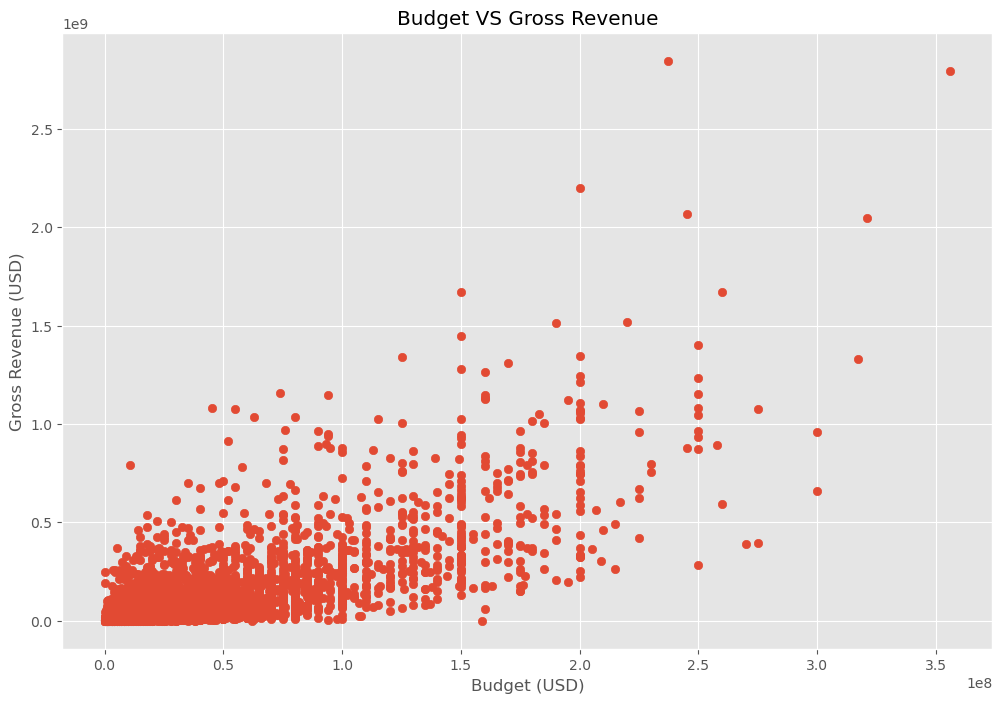

In [22]:
#scatterplot comparing budget and gross revenue

plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget VS Gross Revenue')
plt.xlabel('Budget (USD)')
plt.ylabel('Gross Revenue (USD)')

<Axes: xlabel='budget', ylabel='gross'>

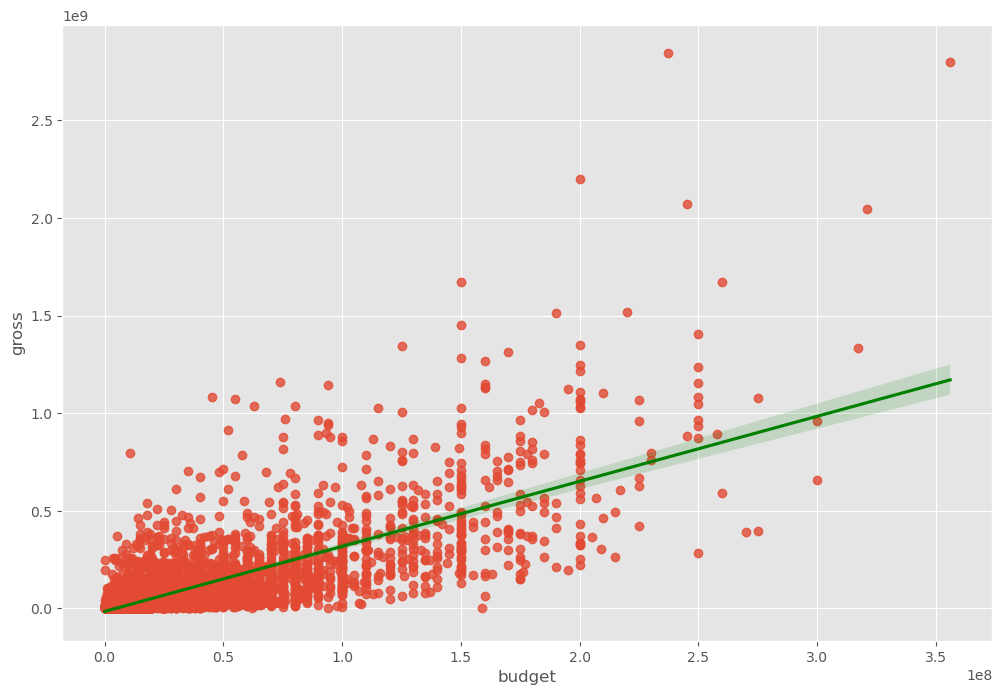

In [24]:
#creating regression line to find correlation using seaborn
sns.regplot(x='budget',y='gross',data=df, line_kws = {"color":"green"})

In [29]:
#Checking correlation coefficients of different variables
df.corr(numeric_only=True)
#Strong correlation between budget and gross

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.329321,0.257486,0.120811
score,0.097995,1.000000,0.409182,0.076254,0.186258,0.399451
votes,0.222945,0.409182,1.000000,0.442429,0.630757,0.309212
budget,0.329321,0.076254,0.442429,1.000000,0.740395,0.320447
gross,0.257486,0.186258,0.630757,0.740395,1.000000,0.245216
runtime,0.120811,0.399451,0.309212,0.320447,0.245216,1.000000


Text(120.72222222222221, 0.5, 'Movie Field')

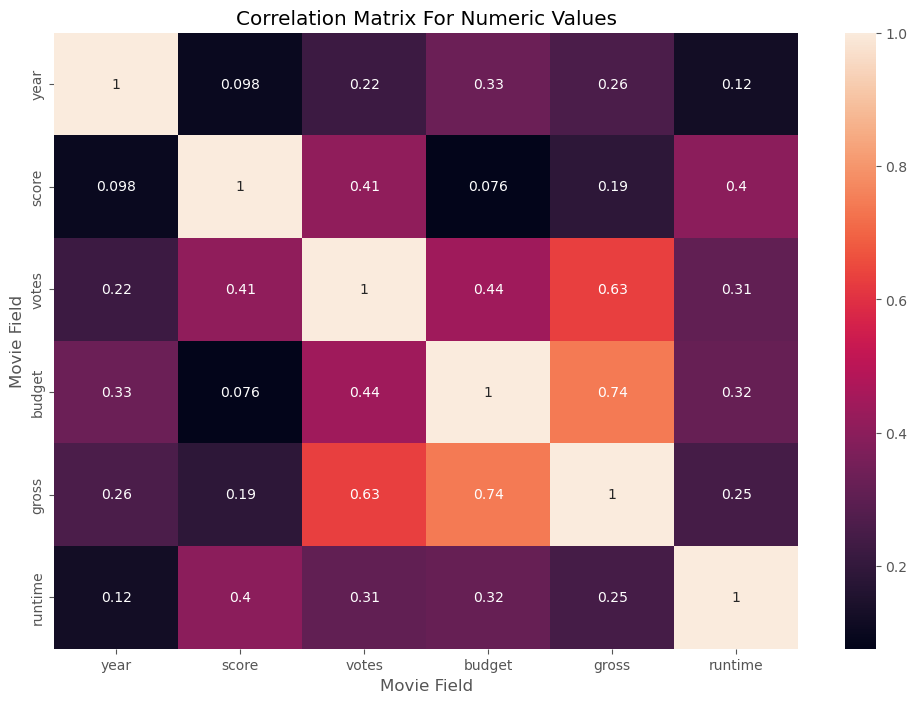

In [31]:
#Visualtion for correlation between seperate variables
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot = True)
plt.title('Correlation Matrix For Numeric Values')
plt.xlabel('Movie Field')
plt.ylabel('Movie Field')

In [61]:
#Quicker visualization for correlation pairs

corr_pairs = correlation_matrix.unstack()
sorted_corr_pairs = corr_pairs.sort_values()
sorted_corr_pairs

budget   score      0.076254
score    budget     0.076254
year     score      0.097995
score    year       0.097995
year     runtime    0.120811
runtime  year       0.120811
gross    score      0.186258
score    gross      0.186258
year     votes      0.222945
votes    year       0.222945
gross    runtime    0.245216
runtime  gross      0.245216
year     gross      0.257486
gross    year       0.257486
votes    runtime    0.309212
runtime  votes      0.309212
budget   runtime    0.320447
runtime  budget     0.320447
budget   year       0.329321
year     budget     0.329321
score    runtime    0.399451
runtime  score      0.399451
score    votes      0.409182
votes    score      0.409182
         budget     0.442429
budget   votes      0.442429
votes    gross      0.630757
gross    votes      0.630757
budget   gross      0.740395
gross    budget     0.740395
year     year       1.000000
budget   budget     1.000000
votes    votes      1.000000
score    score      1.000000
gross    gross

In [ ]:
#Budget has highest correlation with gross